## About Dataset

This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

Key Features:

*Temperature (°C): Average temperature of the region.

*Humidity (%): Relative humidity recorded in the region.

*PM2.5 Concentration (µg/m³): Fine particulate matter levels.

*PM10 Concentration (µg/m³): Coarse particulate matter levels.

*NO2 Concentration (ppb): Nitrogen dioxide levels.

*SO2 Concentration (ppb): Sulfur dioxide levels.

*CO Concentration (ppm): Carbon monoxide levels.

*Proximity to Industrial Areas (km): Distance to the nearest industrial zone.

*Population Density (people/km²): Number of people per square kilometer in the region.

**Target Variable: Air Quality Levels

1. Good: Clean air with low pollution levels.
2. Moderate: Acceptable air quality but with some pollutants present.
3. Poor: Noticeable pollution that may cause health issues for sensitive groups.
4. Hazardous: Highly polluted air posing serious health risks to the population.

## Predicting Air Quality Using Machine Learning

we are going to take a following approach 
1. Problem Definition
2. Data
3. Evaluation
4. Modelling
5. Experimentation

In [153]:
# import all tools we need

# Data Analysis and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Model for scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [154]:
# import dataset
df = pd.read_csv("../../../dataset/updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [155]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [157]:
# Check empty column
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [158]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [159]:
# encoding target value category into numbers
custom_mapping = {'Moderate':0, 'Good':1, 'Hazardous':2, 'Poor':3 }

df['Air Quality'] = df['Air Quality'].map(custom_mapping)
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,2
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,0
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,0
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,1


In [160]:
df['Air Quality'].value_counts()

Air Quality
1    2000
0    1500
3    1000
2     500
Name: count, dtype: int64

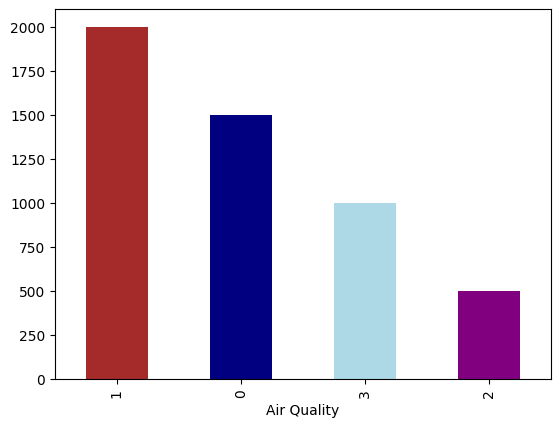

In [161]:
# Let's visual the target value
df['Air Quality'].value_counts().plot(kind="bar", color=["brown", "navy", "lightblue", "purple"]);

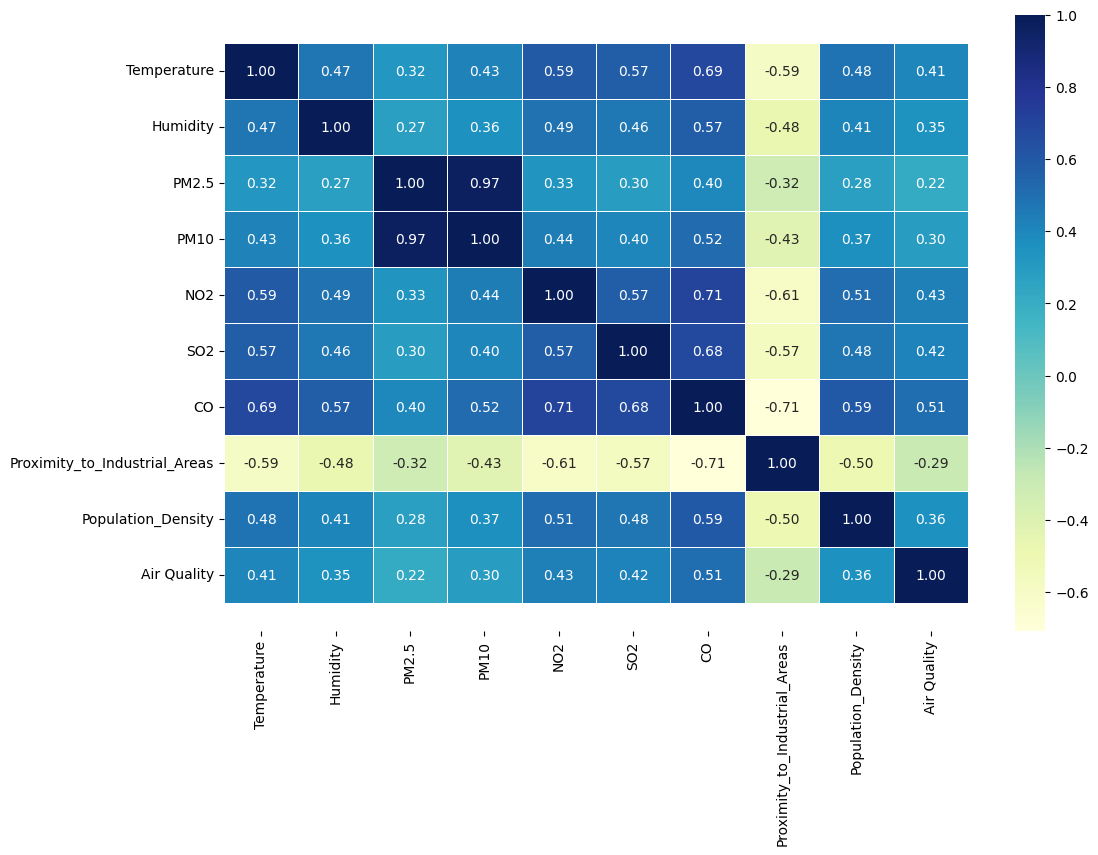

In [162]:
# visula then corr relation
corr_matrix = df.corr()
ax, fig = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu" 
                )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5);

## Modelling

now we are going to try 5 models for test prediction
1. Logistic Regression
2. KNeighborsClassifier
3. Kernal Support Vector Machine
4. Random Forest Regression
5. Naive Bayes


In [163]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1


In [164]:
# setup random seed
np.random.seed(42)

# create X and y
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [165]:
len(X_train), len(X_test)

(4000, 1000)

### Train model without hyperperameter

In [228]:
# model disct
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGB": XGBClassifier()
}

def model_and_score(models, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)

    # make a dict to keep model score
    model_score = {}
    for name, model in models.items():
        # fit model
        model.fit(X_train, y_train)
        # evaluate model and store score
        model_score[name]= model.score(X_test, y_test)

    return model_score



In [229]:
model_score = model_and_score(models, X_train, X_test, y_train, y_test)
model_score

D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.96,
 'Logistic Regression': 0.754,
 'KNN': 0.784,
 'Naive Bayes': 0.926,
 'XGB': 0.961}

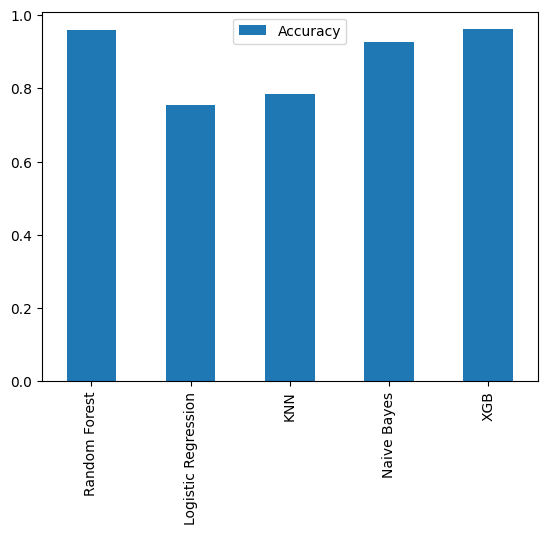

In [230]:
# lets compare all classification model and visual then model predict score
compare_score = pd.DataFrame(model_score, index=['Accuracy'])
compare_score.T.plot(kind="bar");


## Evaluate Model Using Evaluation Function

In [171]:
# get accuracy function
def get_accuracy_score(y_test, y_pred):

    # predict model score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    acc_matric = {
        "accuracy": round(accuracy*100, 2),
        "Precesion": round(precision*100, 2),
        "Recall": round(recall*100, 2),
        "F1": round(f1*100, 2)
    }

    print(f"Accuracy Score:{ accuracy*100:.2f}%")
    print(f"Precision Score: {precision*100:.2f}%") 
    print(f"Recall Score: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")

    return acc_matric



## Hyperparameter Tuning
Setup hyperparameter tuning for RandomForestRegression, LogisticRegression, KNN, Naive Bayes, SVM, XGB

In [215]:
# Set different hyperparameter for RandomForestClassification
random_forest_para_grid = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# set different hyperparameter for logisticRegression
log_reg_para_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga']
}

# set different hyperparameter for Naive Bayes 
nv_para_grid = {
    'var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-6]
}

# set different pyperparameter for KNeighborsClassifier
knn_para_grid = {
    'n_neighbors': np.arange(1, 30, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto','ball_tree', 'kd_tree'] 
}

# set different pyperparameter for XGB
xgb_para_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000], 
    'max_depth': [3, 5, 7, 10], 
}


## RandomForestClassification With RrandomizedSearchCv

In [173]:
random_search = RandomizedSearchCV(
                                RandomForestClassifier(),
                                param_distributions=random_forest_para_grid,
                                n_iter=10,
                                cv=5,
                                verbose=2
                            ) 
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   3.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   3.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [175]:
random_search.best_params_

{'n_estimators': 350,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [176]:
random_search.score(X_test, y_test)

0.958

In [177]:
model_score

{'Random Forest': 0.96,
 'Logistic Regression': 0.754,
 'KNN': 0.784,
 'Naive Bayes': 0.926,
 'XGB': 0.961}

In [178]:
y_pred = random_search.predict(X_test)

In [225]:
rs_random_acc = get_accuracy_score(y_test, y_pred)

Accuracy Score:95.80%
Precision Score: 95.81%
Recall Score: 95.80%
F1 Score: 95.80%


In [226]:
rs_random_acc

{'accuracy': 95.8, 'Precesion': 95.81, 'Recall': 95.8, 'F1': 95.8}

In [67]:
# random_forest_score = {k: v * 100 for k, v in random_forest_score.items()}
# random_forest_score

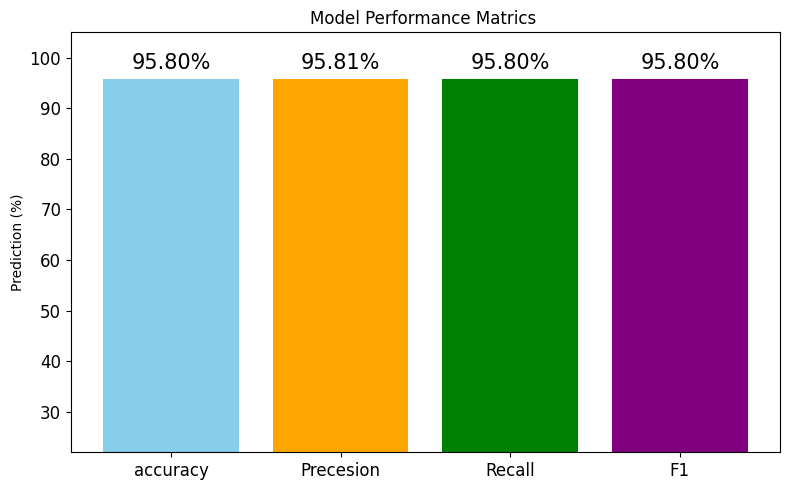

In [227]:
# let's compare model Performance for RandomForstClassifier

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(rs_random_acc.keys(), rs_random_acc.values(), color=['skyblue', 'orange', 'green', 'purple'])
bottom, top = ax.set_ylim(20, 100)
ax.set_ylim(bottom + 2, top + 5)

plt.title("Model Performance Matrics ")
plt.ylabel("Prediction (%)")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplots_adjust(top=2)

# Display each bar with the score value
for i, (matrics, score) in enumerate(rs_random_acc.items()):
    ax.text(i, score+2, f"{score:.2f}%", ha="center", fontsize=15)


plt.tight_layout()
plt.show()


## LogisticRegression With RrandomizedSearchCv

In [182]:
rs_log_reg = RandomizedSearchCV(
                            LogisticRegression(),
                            param_distributions=log_reg_para_grid,
                            n_iter=10,
                            cv=5,
                            verbose=2
                        )
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s


D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s
[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s
[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s


D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\

[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s
[CV] END ...............C=0.0018329807108324356, solver=saga; total time=   0.0s
[CV] END ...............C=0.0018329807108324356, solver=saga; total time=   0.0s


D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............C=0.0018329807108324356, solver=saga; total time=   0.0s
[CV] END ...............C=0.0018329807108324356, solver=saga; total time=   0.0s
[CV] END ...............C=0.0018329807108324356, solver=saga; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545

D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=0.03359818286283781, solver=saga; total time=   0.0s
[CV] END .................C=0.03359818286283781, solver=saga; total time=   0.0s
[CV] END .................C=0.03359818286283781, solver=saga; total time=   0.0s


D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=0.03359818286283781, solver=saga; total time=   0.0s
[CV] END .................C=0.03359818286283781, solver=saga; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.6

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga']},
                   verbose=2)

In [183]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [184]:
rs_log_reg.score(X_test, y_test)

0.88

In [185]:
model_score

{'Random Forest': 0.96,
 'Logistic Regression': 0.754,
 'KNN': 0.784,
 'Naive Bayes': 0.926,
 'XGB': 0.961}

In [186]:
log_y_pred = rs_log_reg.predict(X_test)

In [240]:
log_acc_score = get_accuracy_score(y_test, log_y_pred)

Accuracy Score:88.00%
Precision Score: 87.97%
Recall Score: 88.00%
F1 Score: 87.55%


In [241]:
log_acc_score

{'accuracy': 88.0, 'Precesion': 87.97, 'Recall': 88.0, 'F1': 87.55}

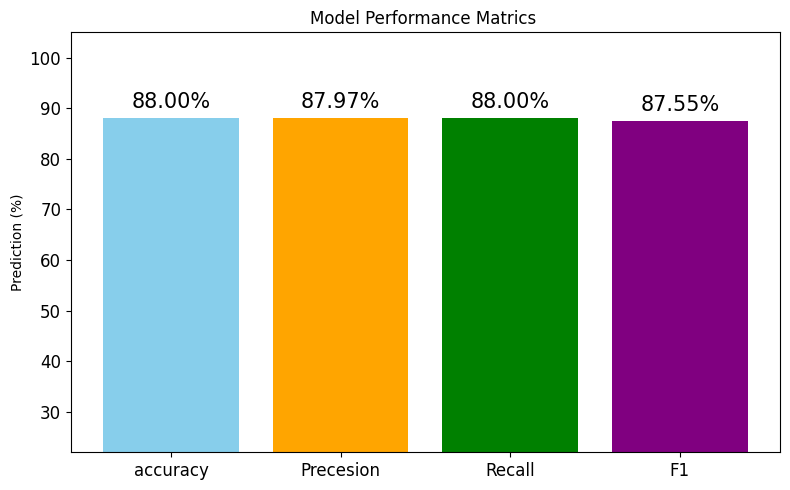

In [189]:
# let's compare model Performance for LogisticRegression 

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(log_acc_score.keys(), log_acc_score.values(), color=['skyblue', 'orange', 'green', 'purple'])
bottom, top = ax.set_ylim(20, 100)
ax.set_ylim(bottom + 2, top + 5)

plt.title("Model Performance Matrics ")
plt.ylabel("Prediction (%)")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Display each bar with the score value
for i, (matrics, score) in enumerate(log_acc_score.items()):
    ax.text(i, score+2, f"{score:.2f}%", ha="center", fontsize=15)


plt.tight_layout()
plt.show()

## KNN With RrandomizedSearchCv

In [123]:
rs_knn = RandomizedSearchCV(
                            KNeighborsClassifier(),
                            param_distributions=knn_para_grid,
                            n_iter=10,
                            cv=5,
                            verbose=2
                            )
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...algorithm=auto, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END ...algorithm=auto, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END ...algorithm=auto, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END ...algorithm=auto, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END ...algorithm=auto, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=11, wei

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [190]:
rs_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'auto'}

In [191]:
rs_knn.score(X_test, y_test)

0.797

In [192]:
model_score

{'Random Forest': 0.96,
 'Logistic Regression': 0.754,
 'KNN': 0.784,
 'Naive Bayes': 0.926,
 'XGB': 0.961}

In [193]:
knn_y_pred = rs_knn.predict(X_test)

In [194]:
knn_acc_score = get_accuracy_score(y_test, knn_y_pred)
knn_acc_score

Accuracy Score:79.70%
Precision Score: 80.17%
Recall Score: 79.70%
F1 Score: 79.33%


{'accuracy': 79.7, 'Precesion': 80.17, 'Recall': 79.7, 'F1': 79.33}

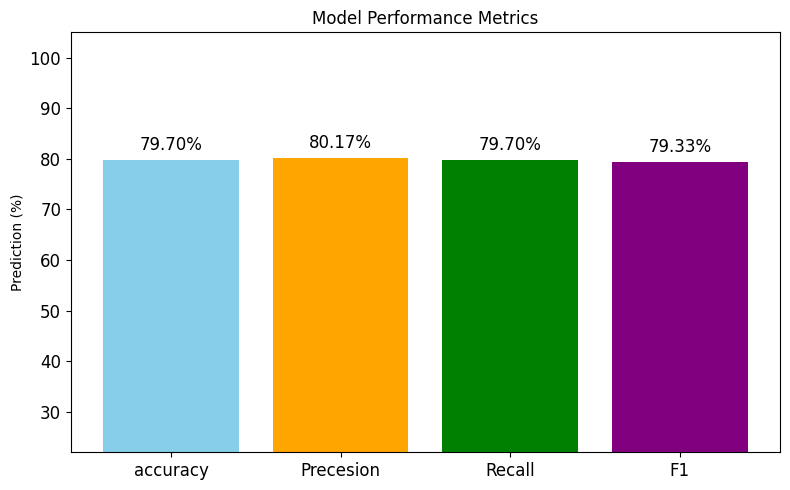

In [195]:
# let's compare model Performance for KNeighborsClassifier

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(knn_acc_score.keys(), knn_acc_score.values(), color=['skyblue', 'orange', 'green', 'purple'])
bottom, top = ax.set_ylim(20, 100)
ax.set_ylim(bottom + 2, top+5)

# customize plot
plt.title("Model Performance Metrics")
plt.ylabel("Prediction (%)")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Display each bar with the score value
for i, (metrics, score) in enumerate(knn_acc_score.items()):
    ax.text(i, score+2, f"{score:.2f}%", ha="center", fontsize=12)


plt.tight_layout()
plt.show();


## Naive Bayes with RrandomizedSearchCv

In [196]:
rs_naive_bays = RandomizedSearchCV(
    GaussianNB(),
    param_distributions=nv_para_grid,
    n_iter=10,
    cv=10,
    verbose=2
)
rs_naive_bays.fit(X_train, y_train)

D:\machine-learning\machine-learning-project\classification-project\air-quality-project\env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smo

RandomizedSearchCV(cv=10, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [1e-12, 1e-10, 1e-09,
                                                          1e-08, 1e-06]},
                   verbose=2)

In [197]:
rs_naive_bays.best_params_

{'var_smoothing': 1e-12}

In [198]:
rs_y_nav_bayes = rs_naive_bays.predict(X_test)

In [199]:
rs_nav_acc = get_accuracy_score(y_test, rs_y_nav_bayes)
rs_nav_acc

Accuracy Score:92.60%
Precision Score: 92.80%
Recall Score: 92.60%
F1 Score: 92.62%


{'accuracy': 92.6, 'Precesion': 92.8, 'Recall': 92.6, 'F1': 92.62}

In [200]:
model_score

{'Random Forest': 0.96,
 'Logistic Regression': 0.754,
 'KNN': 0.784,
 'Naive Bayes': 0.926,
 'XGB': 0.961}

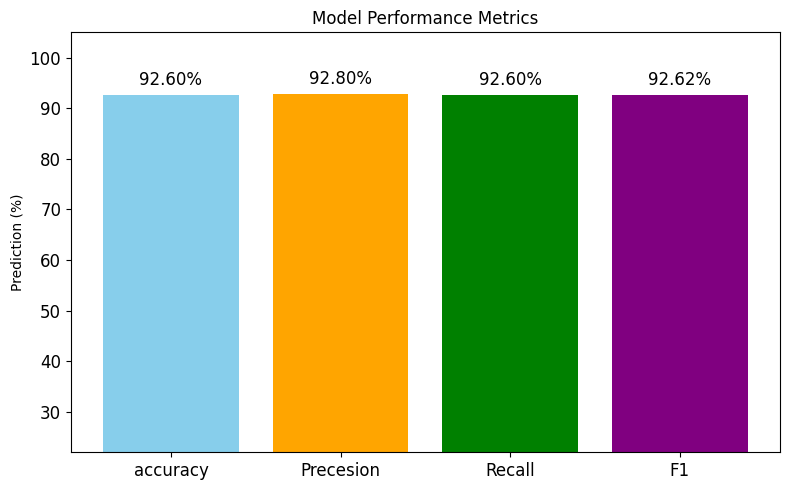

In [202]:
# let's compare model Performance for Naive Bayes

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(rs_nav_acc.keys(), rs_nav_acc.values(), color=['skyblue', 'orange', 'green', 'purple'])
bottom, top = ax.set_ylim(20, 100)
ax.set_ylim(bottom + 2, top+5)

# customize plot
plt.title("Model Performance Metrics")
plt.ylabel("Prediction (%)")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Display each bar with the score value
for i, (metrics, score) in enumerate(rs_nav_acc.items()):
    ax.text(i, score+2, f"{score:.2f}%", ha="center", fontsize=12)


plt.tight_layout()
plt.show();

## XGB With RrandomizedSearchCv

In [216]:
rs_xgb = RandomizedSearchCV(
        XGBClassifier(),
        param_distributions=xgb_para_grid,
        n_iter=10,
        cv=5,
        verbose=2
    )

rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................max_depth=7, n_estimators=500; total time=   0.4s
[CV] END ......................max_depth=7, n_estimators=500; total time=   0.4s
[CV] END ......................max_depth=7, n_estimators=500; total time=   0.4s
[CV] END ......................max_depth=7, n_estimators=500; total time=   0.4s
[CV] END ......................max_depth=7, n_estimators=500; total time=   0.4s
[CV] END .....................max_depth=7, n_estimators=1000; total time=   0.7s
[CV] END .....................max_depth=7, n_estimators=1000; total time=   0.7s
[CV] END .....................max_depth=7, n_estimators=1000; total time=   1.0s
[CV] END .....................max_depth=7, n_estimators=1000; total time=   0.8s
[CV] END .....................max_depth=7, n_estimators=1000; total time=   0.8s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   0.8s
[CV] END .....................max_depth=5, n_est

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000]},
                   verbose=2)

In [217]:
rs_xgb.best_params_

{'n_estimators': 500, 'max_depth': 5}

In [218]:
rs_xgb.score(X_test, y_test)

0.959

In [221]:
rs_y_xgb = rs_xgb.predict(X_test)

In [222]:
rs_xgb_acc = get_accuracy_score(y_test, rs_y_xgb)

Accuracy Score:95.90%
Precision Score: 95.95%
Recall Score: 95.90%
F1 Score: 95.91%


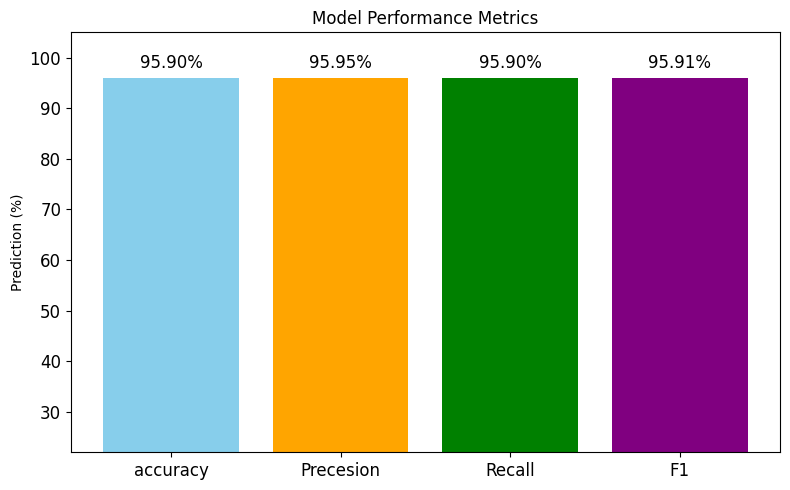

In [231]:
# let's compare model Performance for xgb

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(rs_xgb_acc.keys(), rs_xgb_acc.values(), color=['skyblue', 'orange', 'green', 'purple'])
bottom, top = ax.set_ylim(20, 100)
ax.set_ylim(bottom + 2, top+5)

# customize plot
plt.title("Model Performance Metrics")
plt.ylabel("Prediction (%)")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Display each bar with the score value
for i, (metrics, score) in enumerate(rs_xgb_acc.items()):
    ax.text(i, score+2, f"{score:.2f}%", ha="center", fontsize=12)


plt.tight_layout()
plt.show();

## Lets compare model and visualize The all model together

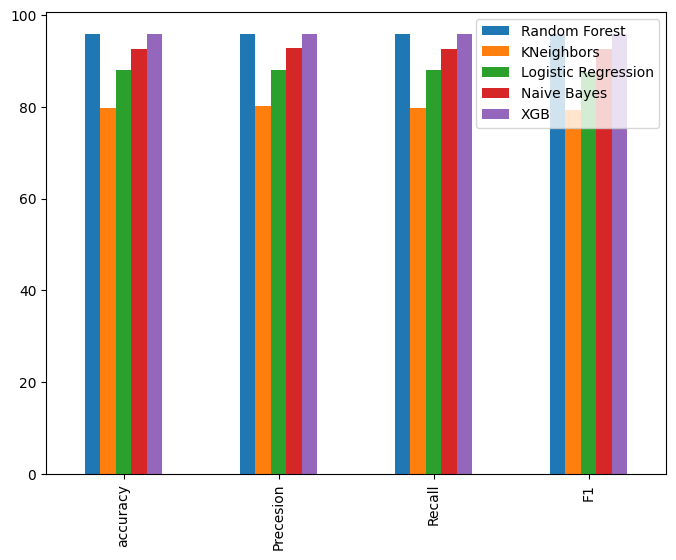

In [248]:
compare_model_metrics = pd.DataFrame({
    "Random Forest": rs_random_acc,
    "KNeighbors": knn_acc_score,
    "Logistic Regression": log_acc_score,
    "Naive Bayes": rs_nav_acc,
    "XGB": rs_xgb_acc
})
 
compare_model_metrics.plot.bar(figsize=(8, 6));

### Now we can see that the best models are RandomForestClassifier and XGB
### So we can use any one classification model for the  air quality dataset

## Save and Load a model

In [250]:
import pickle
with open("air_quality_with_random_forest_classification.pkl", "wb") as file:
    pickle.dump(random_search, file)

In [252]:
# load save data
with open("air_quality_with_random_forest_classification.pkl", "rb") as file:
    loaded_pickle_model = pickle.load(file)

In [257]:
# test accuracy score
pickle_y_preds = loaded_pickle_model.predict(X_test)
get_accuracy_score(y_test, pickle_y_preds)

Accuracy Score:95.80%
Precision Score: 95.81%
Recall Score: 95.80%
F1 Score: 95.80%


{'accuracy': 95.8, 'Precesion': 95.81, 'Recall': 95.8, 'F1': 95.8}